In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import random
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [4]:
FILE_PATH = "q_tweets/datasets/QAnon_tweets.csv"

In [5]:
q_data = pd.read_csv(FILE_PATH, encoding='latin')

/var/folders/ys/4nxkpy2165b7m47pcglh6q780000gn/T/ipykernel_14111/835937674.py:1: DtypeWarning: Columns (5,6,10,14,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  q_data = pd.read_csv(FILE_PATH, encoding='latin')


In [6]:
q_data.columns.to_list()

['id_str',
 'from_user',
 'text',
 'created_at',
 'time',
 'geo_coordinates',
 'user_lang',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'from_user_id_str',
 'in_reply_to_status_id_str',
 'source',
 'profile_image_url',
 'user_followers_count',
 'user_friends_count',
 'user_location',
 'status_url',
 'entities_str',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26',
 'Unnamed: 27',
 'Unnamed: 28',
 'Unnamed: 29',
 'Unnamed: 30',
 'Unnamed: 31',
 'Unnamed: 32',
 'Unnamed: 33',
 'Unnamed: 34']

In [7]:
q_data.dtypes

id_str                       float64
from_user                     object
text                          object
created_at                    object
time                          object
geo_coordinates               object
user_lang                     object
in_reply_to_user_id_str       object
in_reply_to_screen_name       object
from_user_id_str             float64
in_reply_to_status_id_str     object
source                        object
profile_image_url             object
user_followers_count         float64
user_friends_count            object
user_location                 object
status_url                    object
entities_str                  object
Unnamed: 18                   object
Unnamed: 19                   object
Unnamed: 20                   object
Unnamed: 21                   object
Unnamed: 22                   object
Unnamed: 23                   object
Unnamed: 24                   object
Unnamed: 25                   object
Unnamed: 26                   object
U

In [8]:
q_data.head(10)

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,...,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,1.320000e+18,FaktCzech,BREAKING NEWS &gt;&gt;&gt;&gt;\r\n\r\nAccordin...,Tue Oct 20 23:59:03 +0000 2020,21/10/2020 00:59:03,NaN,NaN,NaN,NaN,9.530000e+17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.320000e+18,TruthBomber_,All we need now is for the hard drive to have ...,Tue Oct 20 23:58:37 +0000 2020,21/10/2020 00:58:37,NaN,NaN,NaN,NaN,4.717302e+08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.320000e+18,paperHERRO,Thatâs so sad. Not surprising that thereâ...,Tue Oct 20 23:55:57 +0000 2020,21/10/2020 00:55:57,NaN,NaN,NaN,NaN,1.300000e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.320000e+18,FFelice1983,"Nelle sale del museo, i seguaci di BelzebÃ¹ pr...",Tue Oct 20 23:53:30 +0000 2020,21/10/2020 00:53:30,NaN,NaN,1.30E+18,FFelice1983,1.300000e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.320000e+18,FFelice1983,"Nelle sale del museo, i seguaci di BelzebÃ¹ pr...",Tue Oct 20 23:53:30 +0000 2020,21/10/2020 00:53:30,NaN,NaN,1.30E+18,FFelice1983,1.300000e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.320000e+18,PatchesinIowa,#QAnon2020 That's not pizza sauce in those jar...,Tue Oct 20 23:52:18 +0000 2020,21/10/2020 00:52:18,NaN,NaN,NaN,NaN,1.280000e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.320000e+18,MartinA41573803,@lalovestrump PER #QANON VOTE FOR JFK JR. HE C...,Tue Oct 20 23:49:03 +0000 2020,21/10/2020 00:49:03,NaN,NaN,2919047954,lalovestrump,1.210000e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.320000e+18,jetboy24,Half of Trump's supporters BELIEVE QAnon claim...,Tue Oct 20 23:48:18 +0000 2020,21/10/2020 00:48:18,NaN,NaN,NaN,NaN,6.215427e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.320000e+18,bidenharrisgear,@briantylercohen @fudgestripes @kylegriffin1 D...,Tue Oct 20 23:47:54 +0000 2020,21/10/2020 00:47:54,NaN,NaN,455684839,briantylercohen,1.260000e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.320000e+18,bidenharrisgear,@briantylercohen @fudgestripes @kylegriffin1 D...,Tue Oct 20 23:47:54 +0000 2020,21/10/2020 00:47:54,NaN,NaN,455684839,briantylercohen,1.260000e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
q_data.columns[0]

'id_str'

In [10]:
q_users = q_data[['from_user', 'in_reply_to_screen_name']]

In [11]:
q_users.head(10)

,from_user,in_reply_to_screen_name
0,FaktCzech,NaN
1,TruthBomber_,NaN
2,paperHERRO,NaN
3,FFelice1983,FFelice1983
4,FFelice1983,FFelice1983
5,PatchesinIowa,NaN
6,MartinA41573803,lalovestrump
7,jetboy24,NaN
8,bidenharrisgear,briantylercohen
9,bidenharrisgear,briantylercohen


In [12]:
q_users.shape

(526843, 2)

In [13]:
q_users = q_users.dropna()

In [14]:
q_users.shape

(48852, 2)

In [15]:
q_users = q_users[q_users['from_user'] != q_users['in_reply_to_screen_name']]

In [ ]:
q_users.shape

(43113, 2)

In [17]:
q_users = q_users[q_users['from_user'].str.len() <= 20]


In [18]:
q_users = q_users[q_users['in_reply_to_screen_name'].str.len() <= 20]

In [19]:
q_users.shape

(42916, 2)

In [20]:
q_users.head(10)

,from_user,in_reply_to_screen_name
6,MartinA41573803,lalovestrump
8,bidenharrisgear,briantylercohen
9,bidenharrisgear,briantylercohen
11,finefrenzee,mmcintire
14,MeTooIDissent,realDonaldTrump
34,fun_horse,GOP
36,PalaceMrs,yashar
50,2Freelancer,Qanon76
51,2Freelancer,Qanon76
58,DoctorManhatt17,danielchaitin7


In [21]:
pairs_df = pd.melt(q_users, id_vars=['from_user'], value_vars=['in_reply_to_screen_name'])

In [22]:
pairs_df = pairs_df.groupby(['from_user', 'value'])['value'].count().reset_index(name='count')

In [23]:
pairs_df

,from_user,value,count
0,00010001b,jack,1
1,01001101NO,BananaBanana151,1
2,01001101NO,BillKristol,1
3,01001101NO,GOPLeader,2
4,01001101NO,RepDLesko,1
...,...,...,...
31942,zuuliebullie,Joe_Runge,2
31943,zvalbrun,CFK1986,1
31944,zxg911,DonaldL86161042,1
31945,zxg911,HeidiNBC,1


In [24]:
users = q_users['from_user'].unique().tolist() + q_users['in_reply_to_screen_name'].unique().tolist()

In [25]:
users = list(set(users))

In [26]:
users[:10]

['lizzyvoice',
 'Cocofashion13',
 'JeanneMarie2',
 'HaydenR65087665',
 'SimonaDeLorenz2',
 'vlg001',
 'theveritybook',
 'Lindenberger',
 'queenofbabble',
 'DDesBaillets']

In [27]:
adj_matrix = pd.crosstab(q_users['from_user'], q_users['in_reply_to_screen_name'])

In [28]:
adj_matrix

in_reply_to_screen_name,0000Condor,003Tammy,00_dac,00geoffrey,00sgurl,03mame03,0519Harper,0C0RV0,0Letha0,0Newearth2,...,zondagmetlubach,zoochum,zorcman,zsitter,zsolt59,zuszes,zvalbrun,zwash300,zx101z,zynga
from_user,,,,,,,,,,,,,,,,,,,,,
00010001b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01001101NO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01101000___,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0394190JW,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
07glen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuschoen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zuuliebullie,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zvalbrun,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
adj_matrix = adj_matrix.loc[~(adj_matrix == 0).all(axis=1)]
adj_matrix = adj_matrix.loc[:, ~(adj_matrix == 0).all(axis=0)]

In [30]:
adj_matrix

in_reply_to_screen_name,0000Condor,003Tammy,00_dac,00geoffrey,00sgurl,03mame03,0519Harper,0C0RV0,0Letha0,0Newearth2,...,zondagmetlubach,zoochum,zorcman,zsitter,zsolt59,zuszes,zvalbrun,zwash300,zx101z,zynga
from_user,,,,,,,,,,,,,,,,,,,,,
00010001b,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01001101NO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01101000___,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0394190JW,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
07glen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuschoen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zuuliebullie,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
zvalbrun,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
adj_matrix.shape

(17495, 16377)

In [32]:
adj_matrix = adj_matrix[:16377]

In [33]:
adj_matrix.shape

(16377, 16377)

In [51]:
threshold = 10
adj_matrix = adj_matrix.loc[(adj_matrix > threshold).any(axis=1)]
adj_matrix = adj_matrix.loc[:, (adj_matrix > threshold).any(axis=0)]

In [66]:
adj_matrix = adj_matrix[:32]

In [67]:
adj_matrix.shape

(32, 32)

In [43]:
adj_matrix

in_reply_to_screen_name,1.28E+18,AmericaExpanded,BreitbartNews,David_MinorKY,DrChrisNorthrup,EyesOnQ,GOP,GenFlynn,HSRetoucher,JoeBiden,...,latimes,martingeddes,mtgreenee,newsmax,nippchip,ranch_woman85,realDonaldTrump,sbnauman,thehill,toomuch72
from_user,,,,,,,,,,,,,,,,,,,,,
0NotImportant1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Amon02687391,0,0,0,0,0,27,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AnOpiner,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,18,0,0,0
AndreDrouin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CosmicActorVist,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DaleRenfoer,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,23,0,0,0
GreatnessPundit,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,14,0,0,0,30
HeadlineZooo,0,0,0,0,0,0,0,0,0,0,...,12,0,0,0,0,0,0,0,0,0
HeatherLeard2,0,0,0,0,0,0,0,0,11,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
adj_matrix.index = adj_matrix.columns

In [69]:
G = nx.from_pandas_adjacency(adj_matrix)

In [70]:
import scipy

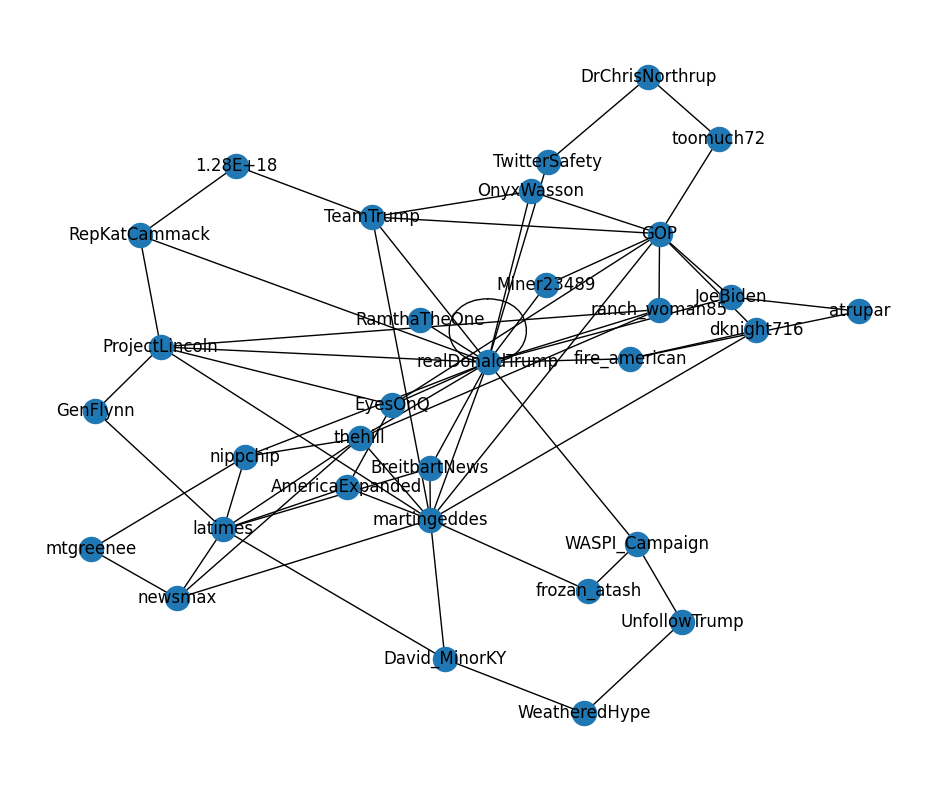

In [71]:
fig, ax = plt.subplots(figsize=(12,10))
nx.draw(G, with_labels=True, font_size=12, edge_color='black', ax=ax)

plt.show()